This notebook creates plots of the LSA context vectors of the entire corpus by metadata.

In [1]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install **

In [2]:
# Import used modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors.nearest_centroid import NearestCentroid
from scipy.spatial.distance import cdist
from sklearn import metrics

C:\Users\bbcev\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Set working directory 
wd = os.chdir("..")
#os.getcwd()

In [4]:
# Import data
dtm = np.loadtxt("data\LSAcontextVectors.npz", delimiter=",")
wordContextList = pd.read_csv("data\wordContextList.csv")
bnc_meta = pd.read_csv("data\BNC_MetaInfo.csv", index_col=0)
wholeCorpus = np.load("data\contextVectors_wholecorpus_2d.npy")
docInfo = pd.read_csv("data\documentContextInfo.csv", index_col=0)
docInfo["DocID"] = [row[0] for row in docInfo["ContextID"].str.split("_")]
docInfo["ContextNumber"] = [row[1] for row in docInfo["ContextID"].str.split("_")]
bnc_info = pd.merge(docInfo[["ContextID","DocID","ContextNumber","contextIndex"]], bnc_meta, left_on="DocID", right_on="id", how="outer")
corpus = pd.concat([bnc_info, pd.DataFrame(wholeCorpus, columns=["X","Y"])], axis=1)
corpus.columns

Index(['ContextID', 'DocID', 'ContextNumber', 'contextIndex', 'id', 'title',
       'n_words', 'n_tokens', 'n_w', 'n_c', 'n_s', 'publication_date',
       'text_type', 'context', 'respondent_age', 'respondent_class',
       'respondent_sex', 'interaction_type', 'region', 'author_age',
       'author_domicile', 'author_sex', 'author_type', 'audience_age',
       'domain', 'difficulty', 'medium', 'publication_place', 'sampling_type',
       'circulation', 'audience_sex', 'availability', 'mode', 'derived_type',
       'genre', 'X', 'Y'],
      dtype='object')

### Domain

In [6]:
domain_subset = corpus[(corpus["domain"].notnull())&(corpus["domain"]!="---")&(corpus["ContextID"].notnull())]
domain_subset['domain'] = domain_subset['domain'].astype('category')
vectors = dtm[domain_subset.index,:]
vectors.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(44452, 300)

In [11]:
scores = []
for i in range (1000):
    r = np.random.permutation(domain_subset["domain"].values)
    s = metrics.calinski_harabasz_score(vectors, r)
    print(i, s)
    scores.append(s)
print(len(scores))
print(np.mean(scores), np.std(scores))

0 1.0202035958601292
1 1.0085822274460532
2 1.0452365754843345
3 1.0434389225262064
4 0.9964036699925171
5 0.9442271443332368
6 0.9543235440208415
7 0.9872590596505281
8 0.9978173818917916
9 1.0863493005334743
10 0.9692603492923624
11 0.9968434016254615
12 1.0353686077193145
13 0.9863233705854954
14 0.9280043938470846
15 0.9795752910551395
16 1.0054321888504567
17 1.087841221564959
18 0.9592886944649959
19 0.9726409367744457
20 0.9906948080984902
21 1.0208991687930529
22 0.9242934912048016
23 0.9953561691835571
24 0.9400763676633176
25 1.0250865196600398
26 0.9723066931782766
27 0.99900875036424
28 0.9874702266223101
29 0.9787943510297461
30 1.029609119760242
31 0.9875848010978567
32 1.0899812110161682
33 1.031598440487273
34 1.032655755531016
35 1.0482327480142275
36 0.9486796789387287
37 1.0272259175428649
38 1.0084324567640075
39 0.9619729684911364
40 1.0246472550314953
41 0.9712240990909071
42 0.9695043165696178
43 0.9873206016232265
44 1.0210341761444177
45 0.9947269067386703
46 0

365 1.0270231843761672
366 1.0505164489524619
367 1.026835459965904
368 0.9498340231517414
369 0.9654901598341081
370 0.9722971948637518
371 0.9919663160870219
372 1.0590808927137472
373 0.997000707826648
374 1.0054395376179601
375 1.0707883156143947
376 1.045207006429393
377 1.0000233581010822
378 1.0675165547072425
379 1.027627020474951
380 1.0274826008364164
381 0.9632810527095341
382 1.0042811796600284
383 0.9839811352726757
384 1.0556459412128674
385 0.9684757137558128
386 1.0396254131147662
387 0.9143362709015347
388 1.022151763260916
389 1.0626519545373987
390 1.023266562658956
391 0.9730095377761361
392 1.039838486430941
393 0.9736968926659543
394 0.9720683022366119
395 0.9681087469789859
396 0.974201286839972
397 0.9417406739265071
398 0.935189378131229
399 1.0211308906930512
400 1.0416698145673553
401 0.9850298551219648
402 0.9578404483721847
403 0.9939499945669853
404 1.0356178933036484
405 0.9938417129395122
406 1.0774425019944527
407 1.0110327427692478
408 0.98312248139655

725 0.9982440346595144
726 1.0416635699087577
727 0.9767514155656911
728 0.9566594038049218
729 0.9475463703925638
730 1.1025643167220398
731 1.0160188400868835
732 0.9822096965577002
733 1.108614866060556
734 1.0042984657615144
735 0.9825599484450627
736 1.033355058586995
737 1.0221714631732746
738 1.0484728076856242
739 0.9721924832629218
740 0.9654095374229931
741 1.043820720325821
742 1.0469667444664998
743 0.9668928216486116
744 0.9881429339295936
745 1.0273642287486782
746 1.0031289955565075
747 1.0243420622527009
748 1.050000232393567
749 1.0255923612245115
750 0.9553735027943019
751 1.0014053395835942
752 1.0185894762448715
753 1.019446001803331
754 0.9576131510081554
755 1.0009739214278117
756 0.9992616212098906
757 0.9443025213280949
758 0.9694934833910703
759 0.9772226942995939
760 1.016725781695494
761 1.0326932506471
762 1.0303430377038643
763 0.9845667493148972
764 0.9668851686845811
765 0.9693280998110815
766 1.0809426298551974
767 0.9681951491714802
768 0.96385782114844

In [7]:
domain_subset["Condition"] = "DomainLabels"
random = domain_subset[domain_subset.columns[:-1]]
random['domain'] = np.random.permutation(random["domain"].values)
random["Condition"] = "RandomLabels"
plotSubset = domain_subset.append(random)
plotSubset['domain'] = plotSubset['domain'].astype('category')
plotSubset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ContextID DocID ContextNumber  contextIndex   id  \
0         B76_1   B76             1           0.0  B76   
1         B76_2   B76             2           1.0  B76   
2         B76_3   B76             3           2.0  B76   
3         B76_4   B76             4           3.0  B76   
4         B76_5   B76             5           4.0  B76   
5         B76_6   B76             6           5.0  B76   
6         B76_7   B76             7           6.0  B76   
7         B76_8   B76             8           7.0  B76   
8         B76_9   B76             9           8.0  B76   
9        B76_10   B76            10           9.0  B76   
10       B76_11   B76            11          10.0  B76   
11       B76_12   B76            12          11.0  B76   
12       B76_13   B76            13          12.0  B76   
13       B76_14   B76            14          13.0  B76   
14       B76_15   B76            15          14.0  B76   
15       B76_16   B76            16          15.0  B76   
16       B76_17   B76            17          16.0  B76   
17       B76_18   B76            18          17.0  B76   
18       B76_19   B76            19          18.0  B76   
19       B76_20   B76            20          19.0  B76   
20       B76_21   B76            21          20.0  B76   
21       B76_22   B76            22          21.0  B76   
22        B7G_1   B7G             1          22.0  B7G   
23        B7G_2   B7G             2          23.0  B7G   
24        B7G_3   B7G             3          24.0  B7G   
25        B7G_4   B7G             4          25.0  B7G   
26        B7G_5   B7G             5          26.0  B7G   
27        B7G_6   B7G             6          27.0  B7G   
28        B7G_7   B7G             7          28.0  B7G   
29        B7G_8   B7G             8          29.0  B7G   
...         ...   ...           ...           ...  ...   
44447    FAH_12   FAH            12       44447.0  FAH   
44448    FAH_13   FAH            13       44448.0  FAH   
44449    FAH_14   FAH            14       44449.0  FAH   
44450    FAH_15   FAH            15       44450.0  FAH   
44451    FAH_16   FAH            16       44451.0  FAH   
44452    FAH_17   FAH            17       44452.0  FAH   
44453    FAH_18   FAH            18       44453.0  FAH   
44454    FAH_19   FAH            19       44454.0  FAH   
44455    FAH_20   FAH            20       44455.0  FAH   
44456    FAH_21   FAH            21       44456.0  FAH   
44457    FAH_22   FAH            22       44457.0  FAH   
44458     FAB_1   FAB             1       44458.0  FAB   
44459     FAB_2   FAB             2       44459.0  FAB   
44460     FAB_3   FAB             3       44460.0  FAB   
44461     FAB_4   FAB             4       44461.0  FAB   
44462     FAB_5   FAB             5       44462.0  FAB   
44463     FAB_6   FAB             6       44463.0  FAB   
44464     FAB_7   FAB             7       44464.0  FAB   
44465     FAB_8   FAB             8       44465.0  FAB   
44466     FAB_9   FAB             9       44466.0  FAB   
44467    FAB_10   FAB            10       44467.0  FAB   
44468    FAB_11   FAB            11       44468.0  FAB   
44469    FAB_12   FAB            12       44469.0  FAB   
44470    FAB_13   FAB            13       44470.0  FAB   
44471    FAB_14   FAB            14       44471.0  FAB   
44472    FAB_15   FAB            15       44472.0  FAB   
44473    FAB_16   FAB            16       44473.0  FAB   
44474    FAB_17   FAB            17       44474.0  FAB   
44475    FAB_18   FAB            18       44475.0  FAB   
44476    FAB_19   FAB            19       44476.0  FAB   

                                                   title  n_words  n_tokens  \
0      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
1      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
2      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
3      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
4      New Sci

In [8]:
sns.set_context("talk")

Variace Ratio = 320.74


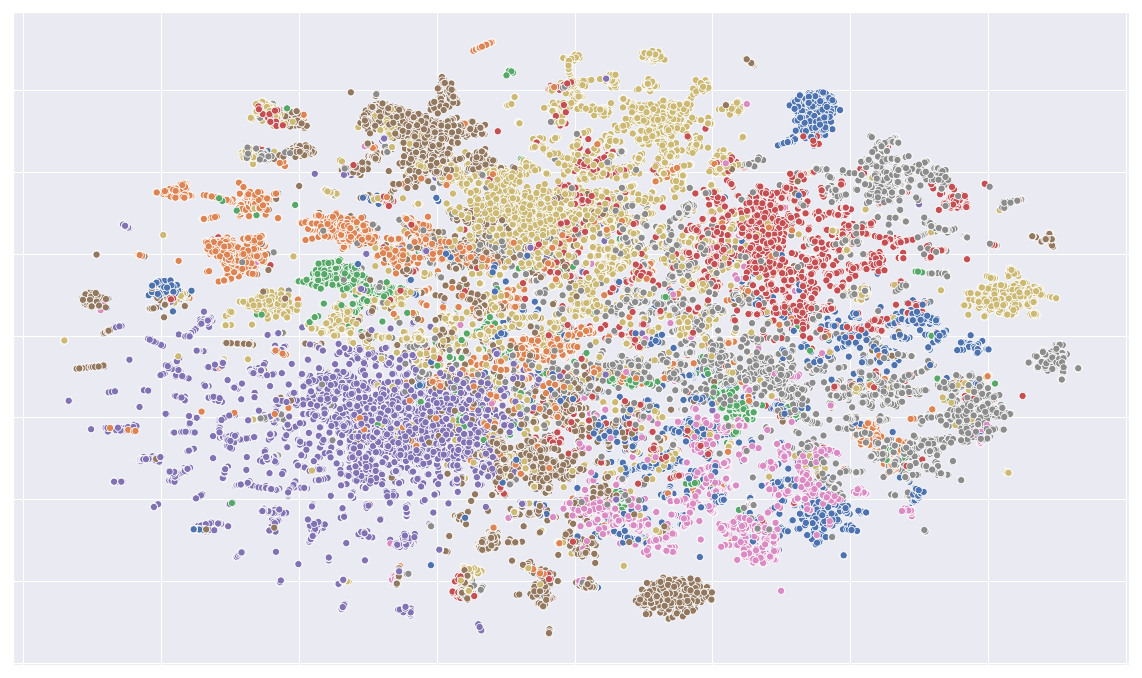

In [9]:
sns.set(rc={'figure.figsize':(20,12)})
p = sns.scatterplot(x="X", y="Y", hue="domain", data=plotSubset[plotSubset["Condition"]=="DomainLabels"], s=50)
p.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
p.legend_.remove()
fig = p.get_figure()
fig.savefig("figures\SemanticDiversityProcedure_LSAbasedApproach_VisualExploration_Metadata_domain.png", 
            format="png", bbox_inches='tight')
varRatio = metrics.calinski_harabasz_score(vectors, plotSubset[plotSubset["Condition"]=="DomainLabels"]["domain"])
print("Variace Ratio = "+str(round(varRatio,2)))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


Variace Ratio = 0.95


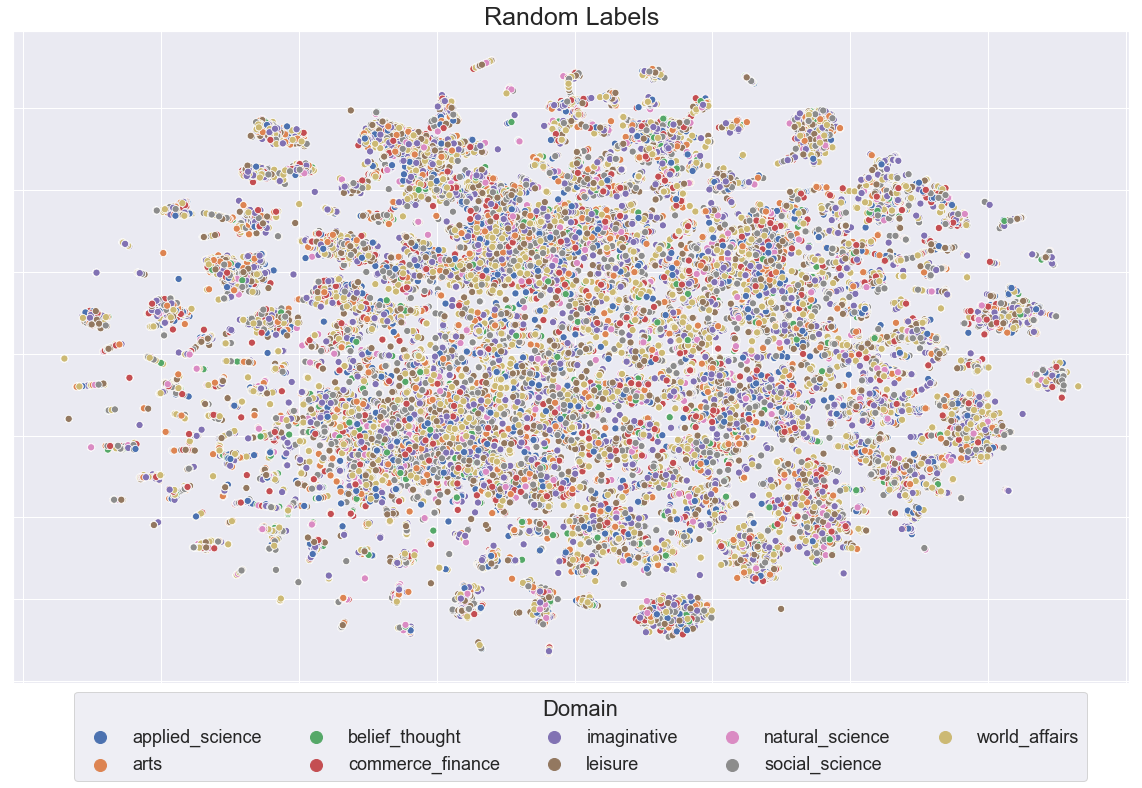

In [10]:
sns.set(rc={'figure.figsize':(20,12)})
p = sns.scatterplot(x="X", y="Y", hue="domain", data=plotSubset[plotSubset["Condition"]=="RandomLabels"], s=50)
p.set_title("Random Labels", fontsize=25)
p.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
handles, labels = p.get_legend_handles_labels()
p.legend(plotSubset[plotSubset["Condition"]=="RandomLabels"]["domain"], title="Domain", bbox_to_anchor=(.97, 0), 
         markerscale=2, handles=handles[1:], labels=labels[1:], fontsize=18, ncol = 5).get_title().set_fontsize(22)
fig = p.get_figure()
fig.savefig("figures\SemanticDiversityProcedure_LSAbasedApproach_VisualExploration_Metadata_domainRandom.png", 
            format="png", bbox_inches='tight')
varRatio = metrics.calinski_harabasz_score(vectors, plotSubset[plotSubset["Condition"]=="RandomLabels"]["domain"])
print("Variace Ratio = "+str(round(varRatio,2)))

The *average distance* from observations to the cluster centroid is a measure of the variability of the observations within each cluster. In general, a cluster that has a smaller average distance is more compact than a cluster that has a larger average distance. Clusters that have higher values exhibit greater variability of the observations within the cluster.

In [11]:
clf = NearestCentroid()
clf.fit(domain_subset[["X","Y"]].values, domain_subset["domain"])
centroids = np.array(clf.centroids_)
avDist = []
for i,d in enumerate(domain_subset["domain"].cat.categories): 
    c = centroids[i].reshape(1, -1)
    avDist.append(np.mean(cdist(c, domain_subset[domain_subset["domain"]==d][["X","Y"]].values, 'cosine')))
d_clusters = pd.DataFrame({'DocTypes':domain_subset["domain"].cat.categories, "AverageDistance": avDist})
d_clusters.sort_values(by="AverageDistance", ascending=False)

DocTypes  AverageDistance
2    belief_thought         0.750512
5           leisure         0.716335
8     world_affairs         0.455438
1              arts         0.442517
0   applied_science         0.406836
7    social_science         0.371529
3  commerce_finance         0.230902
6   natural_science         0.107733
4       imaginative         0.085636

*Calinski-Harabasz index* - also known as the Variance Ratio Criterion - measures the ratio of the between-clusters dispersion mean and the within-cluster dispersion, used to evaluate clustering algorithms performance, where a higher Calinski-Harabasz score indicates better defined clusters.

### Document Type

In [12]:
type_subset = corpus[(corpus["derived_type"].notnull())&(corpus["domain"]!="---")&(corpus["ContextID"].notnull())]
type_subset['derived_type'] = type_subset['derived_type'].astype('category')
vectors = dtm[type_subset.index,:]
vectors.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(44452, 300)

In [13]:
scores = []
for i in range (1000):
    r = np.random.permutation(type_subset["derived_type"].values)
    s = metrics.calinski_harabasz_score(vectors, r)
    print(i, s)
    scores.append(s)
print(len(scores))
print(np.mean(scores), np.std(scores))

0 0.9723624701350385
1 1.084986991171527
2 0.9503372272284671
3 0.9587335011407848
4 0.9382175453566998
5 1.0047254568206527
6 0.9237891380473545
7 0.8928022096335776
8 1.0667386426878263
9 0.9922811903046342
10 1.0193073682049534
11 1.1015279321941824
12 1.0171867052702728
13 1.0805804691453271
14 1.0118563309923536
15 0.9141470772450361
16 0.9744020581834546
17 1.0085208092064073
18 0.9296483961106072
19 0.9044054968333279
20 1.088055282206229
21 0.9350255471715905
22 0.9424147274361082
23 0.9517779771713782
24 0.9542703679661969
25 0.9976962486829573
26 0.9621306980646134
27 0.9323835200360941
28 0.9608017958367082
29 1.0183840605688972
30 1.0238870360337848
31 0.9731450305467884
32 1.018308997418205
33 0.8962563705000828
34 0.9530754588867267
35 0.984321874376843
36 0.9813890974640725
37 1.0100679650002518
38 0.8622417563755095
39 0.9123237359108322
40 1.0432084465027704
41 1.0123523996784596
42 0.9883151394204975
43 1.0186856376612954
44 1.0335629019382346
45 1.0242184829232355
46

364 0.9919858884724392
365 1.022750889298251
366 0.9105165456109997
367 0.9474421261021263
368 0.9196850008222389
369 0.9761202376201106
370 0.9998074831869328
371 1.0438035319968781
372 0.9567181025532084
373 1.1107620963403264
374 1.0152036832986036
375 0.9612406941687964
376 0.9316877535043976
377 1.0728142970794614
378 1.181805738594065
379 0.9251811922127489
380 1.0513925900569316
381 1.0837518938273125
382 1.0400458434167204
383 0.989331682308124
384 0.9168210610167954
385 1.040046292535993
386 0.9644911823198491
387 0.9712648697115213
388 0.9313360595900013
389 0.9597072231434031
390 1.0599598114209616
391 0.9835609467118995
392 1.0524645470037688
393 1.0741815078780876
394 0.9703214358719763
395 1.0954770736322739
396 1.0431437983862988
397 1.0345273657578524
398 1.0356441098262488
399 0.9998977062907187
400 0.9903799281322576
401 1.117523449265025
402 0.9430932090112624
403 0.9867821331008519
404 1.0482448454486673
405 0.9726232469428993
406 1.0164322108632833
407 0.9863514104

723 1.1226349506698454
724 0.9634754617169003
725 0.9543359500265222
726 1.032458189582493
727 1.036233687126287
728 1.0289572789391408
729 1.041596579498318
730 0.9732302702129279
731 0.9811709398566765
732 0.9976633407660077
733 1.0685935930233106
734 0.9915644045926835
735 1.0128708708378171
736 1.0289374992580809
737 1.088502913015669
738 1.059924890794293
739 1.0148490536700645
740 1.0077083227833028
741 0.9213594591169244
742 1.0135257979406107
743 1.005196581363013
744 1.0607435200738706
745 0.9807157685308674
746 1.0138324467870201
747 1.0362103954269384
748 0.9577417233433582
749 1.0191381721009314
750 1.0475767152285138
751 1.0394744090899177
752 0.9709631010533709
753 1.0315566000604963
754 1.1077460059295707
755 0.9920379980802237
756 1.017907743238183
757 0.928360212920675
758 1.0028564055775258
759 1.058386099459287
760 1.013372480807998
761 0.9591040089207339
762 0.9510247986725076
763 0.9510443614268581
764 1.0371861543449137
765 1.0402337804794903
766 1.044619422943647

In [13]:
type_subset["Condition"] = "TypeLabels"
random = type_subset[type_subset.columns[:-1]]
random['derived_type'] = np.random.permutation(random["derived_type"].values)
random["Condition"] = "RandomLabels"
plotSubset = type_subset.append(random)
plotSubset['derived_type'] = plotSubset['derived_type'].astype('category')
plotSubset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ContextID DocID ContextNumber  contextIndex   id  \
0         B76_1   B76             1           0.0  B76   
1         B76_2   B76             2           1.0  B76   
2         B76_3   B76             3           2.0  B76   
3         B76_4   B76             4           3.0  B76   
4         B76_5   B76             5           4.0  B76   
5         B76_6   B76             6           5.0  B76   
6         B76_7   B76             7           6.0  B76   
7         B76_8   B76             8           7.0  B76   
8         B76_9   B76             9           8.0  B76   
9        B76_10   B76            10           9.0  B76   
10       B76_11   B76            11          10.0  B76   
11       B76_12   B76            12          11.0  B76   
12       B76_13   B76            13          12.0  B76   
13       B76_14   B76            14          13.0  B76   
14       B76_15   B76            15          14.0  B76   
15       B76_16   B76            16          15.0  B76   
16       B76_17   B76            17          16.0  B76   
17       B76_18   B76            18          17.0  B76   
18       B76_19   B76            19          18.0  B76   
19       B76_20   B76            20          19.0  B76   
20       B76_21   B76            21          20.0  B76   
21       B76_22   B76            22          21.0  B76   
22        B7G_1   B7G             1          22.0  B7G   
23        B7G_2   B7G             2          23.0  B7G   
24        B7G_3   B7G             3          24.0  B7G   
25        B7G_4   B7G             4          25.0  B7G   
26        B7G_5   B7G             5          26.0  B7G   
27        B7G_6   B7G             6          27.0  B7G   
28        B7G_7   B7G             7          28.0  B7G   
29        B7G_8   B7G             8          29.0  B7G   
...         ...   ...           ...           ...  ...   
44447    FAH_12   FAH            12       44447.0  FAH   
44448    FAH_13   FAH            13       44448.0  FAH   
44449    FAH_14   FAH            14       44449.0  FAH   
44450    FAH_15   FAH            15       44450.0  FAH   
44451    FAH_16   FAH            16       44451.0  FAH   
44452    FAH_17   FAH            17       44452.0  FAH   
44453    FAH_18   FAH            18       44453.0  FAH   
44454    FAH_19   FAH            19       44454.0  FAH   
44455    FAH_20   FAH            20       44455.0  FAH   
44456    FAH_21   FAH            21       44456.0  FAH   
44457    FAH_22   FAH            22       44457.0  FAH   
44458     FAB_1   FAB             1       44458.0  FAB   
44459     FAB_2   FAB             2       44459.0  FAB   
44460     FAB_3   FAB             3       44460.0  FAB   
44461     FAB_4   FAB             4       44461.0  FAB   
44462     FAB_5   FAB             5       44462.0  FAB   
44463     FAB_6   FAB             6       44463.0  FAB   
44464     FAB_7   FAB             7       44464.0  FAB   
44465     FAB_8   FAB             8       44465.0  FAB   
44466     FAB_9   FAB             9       44466.0  FAB   
44467    FAB_10   FAB            10       44467.0  FAB   
44468    FAB_11   FAB            11       44468.0  FAB   
44469    FAB_12   FAB            12       44469.0  FAB   
44470    FAB_13   FAB            13       44470.0  FAB   
44471    FAB_14   FAB            14       44471.0  FAB   
44472    FAB_15   FAB            15       44472.0  FAB   
44473    FAB_16   FAB            16       44473.0  FAB   
44474    FAB_17   FAB            17       44474.0  FAB   
44475    FAB_18   FAB            18       44475.0  FAB   
44476    FAB_19   FAB            19       44476.0  FAB   

                                                   title  n_words  n_tokens  \
0      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
1      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
2      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
3      New Scientist. Sample containing about 40793 w...  40564.0   45947.0   
4      New Sci

In [14]:
sns.set_context("talk")

Variace Ratio = 301.12


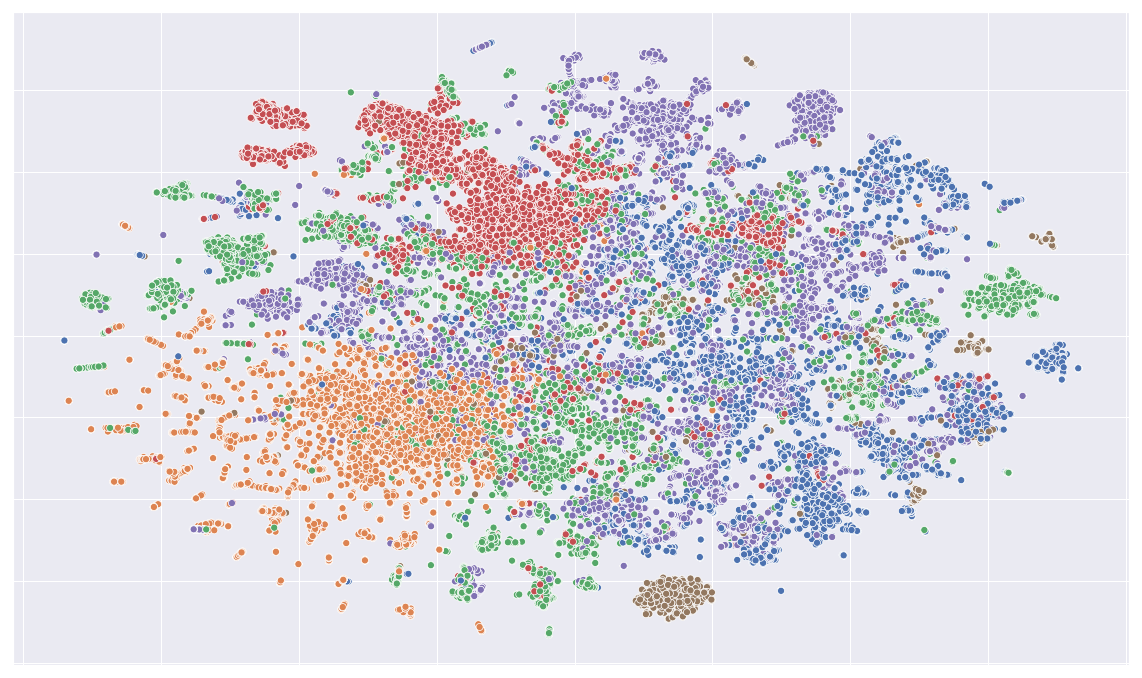

In [15]:
sns.set(rc={'figure.figsize':(20,12)})
p = sns.scatterplot(x="X", y="Y", hue="derived_type", data=plotSubset[plotSubset["Condition"]=="TypeLabels"], s=50)
p.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
p.legend_.remove()
fig = p.get_figure()
fig.savefig("figures\SemanticDiversityProcedure_LSAbasedApproach_VisualExploration_Metadata_type.png", 
            format="png", bbox_inches='tight')
varRatio = metrics.calinski_harabasz_score(vectors, plotSubset[plotSubset["Condition"]=="TypeLabels"]["derived_type"])
print("Variace Ratio = "+str(round(varRatio,2)))

Variace Ratio = 0.97


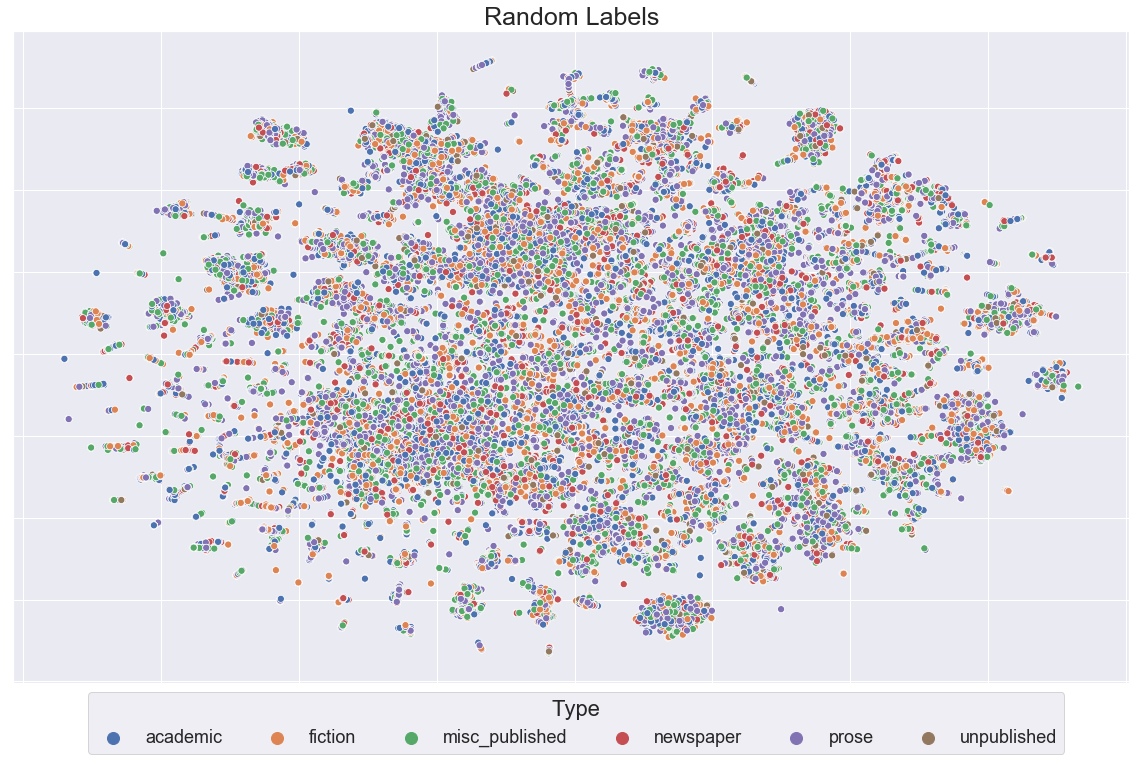

In [23]:
sns.set(rc={'figure.figsize':(20,12)})
p = sns.scatterplot(x="X", y="Y", hue="derived_type", data=plotSubset[plotSubset["Condition"]=="RandomLabels"], s=50)
p.set_title("Random Labels", fontsize=25)
p.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
handles, labels = p.get_legend_handles_labels()
p.legend(title="Type", bbox_to_anchor=(.95, 0), handles=handles[1:], markerscale=2,
         labels=labels[1:], fontsize=18, ncol = 6).get_title().set_fontsize(22)
fig = p.get_figure()
fig.savefig("figures\SemanticDiversityProcedure_LSAbasedApproach_VisualExploration_Metadata_typeRandom.png", 
            format="png", bbox_inches='tight')
varRatio = metrics.calinski_harabasz_score(vectors, plotSubset[plotSubset["Condition"]=="RandomLabels"]["derived_type"])
print("Variace Ratio = "+str(round(varRatio,2)))

In [17]:
clf = NearestCentroid()
clf.fit(type_subset[["X","Y"]].values, type_subset["derived_type"])
centroids = np.array(clf.centroids_)
avDist = []
for i,d in enumerate(type_subset["derived_type"].cat.categories): 
    c = centroids[i].reshape(1, -1)
    avDist.append(np.mean(cdist(c, type_subset[type_subset["derived_type"]==d][["X","Y"]].values, 'cosine')))
t_clusters = pd.DataFrame({'DocTypes':type_subset["derived_type"].cat.categories, "AverageDistance": avDist})
t_clusters.sort_values(by="AverageDistance", ascending=False)

DocTypes  AverageDistance
2  misc_published         0.895600
4           prose         0.770861
5     unpublished         0.501070
0        academic         0.450112
3       newspaper         0.218180
1         fiction         0.081731